### Exploring the trade offs between FoV, Focal length, and diffraction limit of the different colour channels of the bayer array

In [1]:
import numpy as np
import matplotlib.pyplot as plt
image_path = "Images/"

lam = np.linspace(350, 700, 351)
pix = 1.12e-6
R = 0.01

W = [100*4*R*pix/(wl*1e-9) for wl in lam]
RB = [100*2*4*R*pix/(wl*1e-9) for wl in lam]
G = [100*np.sqrt(2)*4*R*pix/(wl*1e-9) for wl in lam]

FL = np.linspace(5 ,25,21)
pix_scale = (1.12e-6 * 2400)*(180/np.pi) *100
FOV = [pix_scale / fl for fl in FL]
    
fig, ax1 = plt.subplots()

ax1.plot(lam, W, label='Raw Bayer array pixel spacing', color='k')
ax1.plot(lam, RB, label='Red and Blue band pixel spacing', color='m')
ax1.plot(lam, G, label='Green band pixel spacing', color='g')

ax1.set_xlabel("Diffraction Limited Wavelength (nm)")
ax1.set_ylabel("Focal Length (cm)")

# xpos = [(450,"b","Central blue band"), (525,"g","Central green band"), (600,"r","Central red band")]
# for x in xpos:
#     ax1.axvline(x=x[0], linestyle='-.', color=x[1], label=x[2], alpha=0.6)
    
# ax1.legend(loc='upper right', bbox_to_anchor=(1.545, 1))
ax1.legend()

ypos = [7.5,15]
# for y in ypos:
#     ax1.axhline(y=y, color='k', linestyle=':', alpha=0.5)


plt.xlim(400,650)
plt.ylim(5,22.5)

c='C0'
ax2 = ax1.twiny()  # instantiate a second axes that shares the same y-axis
ax2.plot(FOV,FL,label='Field of View',linestyle=':',color=c)#, alpha=1)
ax2.set_xlabel("FoV (degrees)", color=c)
ax2.tick_params(axis='x', labelcolor=c)
ax2.legend(loc='center left', bbox_to_anchor=(0.675, 0.7))
# ax2.legend()


# plt.savefig(image_path + "fl_fov.jpg", bbox_inches='tight')

plt.show()

<Figure size 640x480 with 2 Axes>

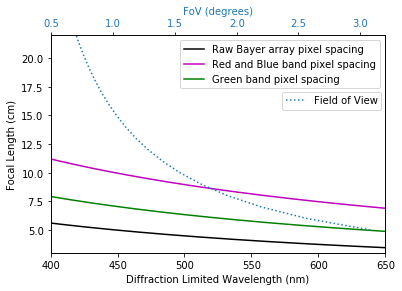

In [3]:
lam = np.linspace(350, 700, 351)
pix = 1.12e-6
R = 0.005

W = [100*4*R*pix/(wl*1e-9) for wl in lam]
RB = [100*2*4*R*pix/(wl*1e-9) for wl in lam]
G = [100*np.sqrt(2)*4*R*pix/(wl*1e-9) for wl in lam]

FL = np.linspace(5 ,25,21)
pix_scale = (1.12e-6 * 2400)*(180/np.pi) *100
FOV = [pix_scale / fl for fl in FL]
    
fig, ax1 = plt.subplots()

ax1.plot(lam, W, label='Raw Bayer array pixel spacing', color='k')
ax1.plot(lam, RB, label='Red and Blue band pixel spacing', color='m')
ax1.plot(lam, G, label='Green band pixel spacing', color='g')

ax1.set_xlabel("Diffraction Limited Wavelength (nm)")
ax1.set_ylabel("Focal Length (cm)")
ax1.legend()

ypos = [7.5,15]

plt.xlim(400,650)
plt.ylim(3,22)

c='C0'
ax2 = ax1.twiny()  # instantiate a second axes that shares the same y-axis
ax2.plot(FOV,FL,label='Field of View',linestyle=':',color=c)#, alpha=1)
ax2.set_xlabel("FoV (degrees)", color=c)
ax2.tick_params(axis='x', labelcolor=c)
ax2.legend(loc='center left', bbox_to_anchor=(0.675, 0.7))
# ax2.legend()


# plt.savefig(image_path + "fl_fov.jpg", bbox_inches='tight')

plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

im = axs[0].imshow(im_out)



    
im = axs[1].imshow(im_out,norm=LogNorm())



fig.tight_layout()
# fig.savefig(image_path + "simple_pupil_FT_grouped.jpg", bbox_inches='tight')

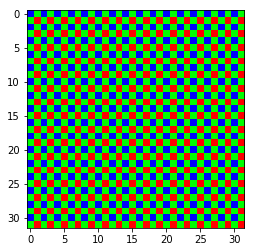

In [6]:
size = 32

bayer_red = np.remainder((np.arange(size))+1,2)
bayer_red = np.outer(bayer_red,bayer_red)

bayer_blue = np.remainder((np.arange(size)),2)
bayer_blue = np.outer(bayer_blue,bayer_blue)

image = np.zeros((size,size,3), np.uint8)
    
for i in range(size):
    for j in range(size):
        if bayer_red[i][j] == 1:
            image[i][j] = (0,0,255)
        elif bayer_blue[i][j] == 1:
            image[i][j] = (255,0,0)
        else:
            image[i][j] = (0,255,0)
    
plt.imshow(image)
# plt.savefig(image_path + "Bayer.jpg", bbox_inches='tight')
plt.show()

In [7]:
from Bayer import get_green, get_red
array = np.zeros((16,16)) + 1
print(array)
print(get_green(array))
print(get_red(array))

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1

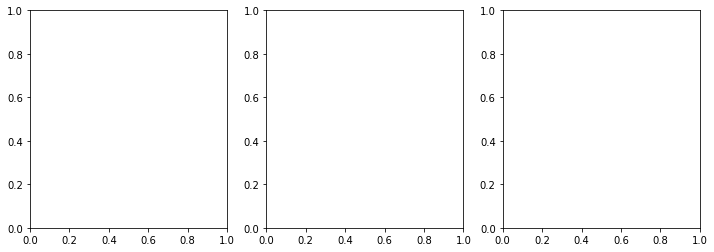

In [8]:

# im = ax.imshow(image)
# plt.colorbar(im,ax=ax,fraction=0.046, pad=0.04)

In [9]:
im_red = np.zeros((size//2,size//2,3), np.uint8)
for i in range(size//2):
    for j in range(size//2):
        im_red[i][j] = (255,0,0)
        
# plt.figure()
# im = plt.imshow(im_red);
im = ax[0].imshow(im_red);

# ax = plt.gca();

# Major ticks
ax[0].set_xticks(np.arange(0, size//2, 1));
ax[0].set_yticks(np.arange(0, size//2, 1));

# Labels for major ticks
ax[0].set_xticklabels(np.arange(1, size//2+1, 1));
ax[0].set_yticklabels(np.arange(1, size//2+1, 1));

# Minor ticks
ax[0].set_xticks(np.arange(-.5, size//2, 1), minor=True);
ax[0].set_yticks(np.arange(-.5, size//2, 1), minor=True);

ax[0].set_xticks([])
ax[0].set_yticks([])

# Gridlines based on minor ticks
ax[0].grid(which='minor', color='k', linestyle='-', linewidth=0.5)
# plt.savefig(image_path + "red_interp.jpg", bbox_inches='tight')

In [10]:
im_blue = np.zeros((size//2,size//2,3), np.uint8)
for i in range(size//2):
    for j in range(size//2):
        im_blue[i][j] = (0,0,255)

# plt.figure()
# im = plt.imshow(im_blue);
im = ax[1].imshow(im_blue);


# ax = plt.gca();

# Major ticks
ax[1].set_xticks(np.arange(0, size//2, 1));
ax[1].set_yticks(np.arange(0, size//2, 1));

# Labels for major ticks
ax[1].set_xticklabels(np.arange(1, size//2+1, 1));
ax[1].set_yticklabels(np.arange(1, size//2+1, 1));

# Minor ticks
ax[1].set_xticks(np.arange(-.5, size//2, 1), minor=True);
ax[1].set_yticks(np.arange(-.5, size//2, 1), minor=True);

ax[1].set_xticks([])
ax[1].set_yticks([])

# Gridlines based on minor ticks
ax[1].grid(which='minor', color='k', linestyle='-', linewidth=0.5)
# plt.savefig(image_path + "blue_interp.jpg", bbox_inches='tight')

In [11]:
chip_dim = size
bayer_green = np.remainder((np.arange(chip_dim**2))+np.arange(chip_dim**2)/chip_dim,2)
bayer_green = bayer_green.reshape(chip_dim,chip_dim)
gnz = bayer_green.nonzero() 
g_mapping = [chip_dim//2 -1 - (gnz[0]-gnz[1])//2,(gnz[0]+gnz[1])//2]
im_green=np.zeros((chip_dim,chip_dim,3))
im_green[g_mapping] = image[gnz]

for i in range(size):
    for j in range(size):
        if image[i][j][0] == 255:
#             print("True")
            image[i][j][0] = 0
            image[i][j][1] = 255        
# plt.figure()
# im = plt.imshow(im_green);
im = ax[2].imshow(im_green);

# ax = plt.gca();

# Major ticks
ax[2].set_xticks(np.arange(0, size, 1));
ax[2].set_yticks(np.arange(0, size, 1));

# Labels for major ticks
ax[2].set_xticklabels(np.arange(1, size+1, 1));
ax[2].set_yticklabels(np.arange(1, size+1, 1));

# Minor ticks
ax[2].set_xticks(np.arange(-.5, size, 1), minor=True);
ax[2].set_yticks(np.arange(-.5, size, 1), minor=True);

ax[2].set_xticks([])
ax[2].set_yticks([])
# Gridlines based on minor ticks
ax[2].grid(which='minor', color='k', linestyle='-', linewidth=0.5)
# plt.savefig(image_path + "green_interp.jpg", bbox_inches='tight')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [12]:
# fig, axs = plt.subplots(1, 3, figsize=(12, 4))
# for image,ax in zip(images,axs):
    
#     im = ax.imshow(image)
#     plt.colorbar(im,ax=ax,fraction=0.046, pad=0.04)

fig.tight_layout()
# fig1.savefig(image_path + "wavels_grouped.jpg", bbox_inches='tight')


# fig2.tight_layout()
# fig2.savefig(image_path + "wavels_LogNorm_grouped.jpg", bbox_inches='tight')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


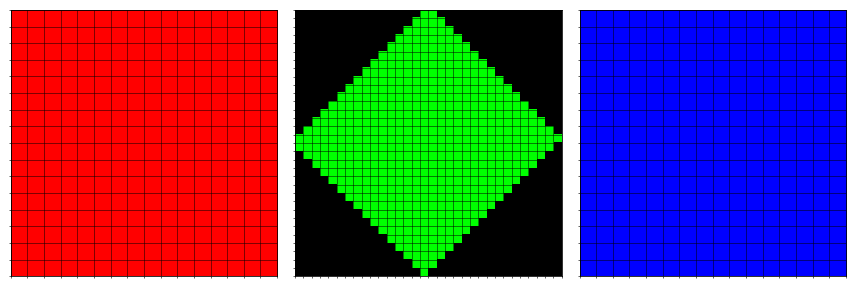

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

im_red = np.zeros((size//2,size//2,3), np.uint8)
for i in range(size//2):
    for j in range(size//2):
        im_red[i][j] = (255,0,0)
        
# plt.figure()
# im = plt.imshow(im_red);
im = ax[0].imshow(im_red);

# ax = plt.gca();

# Major ticks
ax[0].set_xticks(np.arange(0, size//2, 1));
ax[0].set_yticks(np.arange(0, size//2, 1));

# Labels for major ticks
ax[0].set_xticklabels(np.arange(1, size//2+1, 1));
ax[0].set_yticklabels(np.arange(1, size//2+1, 1));

# Minor ticks
ax[0].set_xticks(np.arange(-.5, size//2, 1), minor=True);
ax[0].set_yticks(np.arange(-.5, size//2, 1), minor=True);

ax[0].set_xticks([])
ax[0].set_yticks([])

# Gridlines based on minor ticks
ax[0].grid(which='minor', color='k', linestyle='-', linewidth=0.5)
# plt.savefig(image_path + "red_interp.jpg", bbox_inches='tight')

im_blue = np.zeros((size//2,size//2,3), np.uint8)
for i in range(size//2):
    for j in range(size//2):
        im_blue[i][j] = (0,0,255)

# plt.figure()
# im = plt.imshow(im_blue);
im = ax[2].imshow(im_blue);


# ax = plt.gca();

# Major ticks
ax[2].set_xticks(np.arange(0, size//2, 1));
ax[2].set_yticks(np.arange(0, size//2, 1));

# Labels for major ticks
ax[2].set_xticklabels(np.arange(1, size//2+1, 1));
ax[2].set_yticklabels(np.arange(1, size//2+1, 1));

# Minor ticks
ax[2].set_xticks(np.arange(-.5, size//2, 1), minor=True);
ax[2].set_yticks(np.arange(-.5, size//2, 1), minor=True);

ax[2].set_xticks([])
ax[2].set_yticks([])

# Gridlines based on minor ticks
ax[2].grid(which='minor', color='k', linestyle='-', linewidth=0.5)
# plt.savefig(image_path + "blue_interp.jpg", bbox_inches='tight')

chip_dim = size
bayer_green = np.remainder((np.arange(chip_dim**2))+np.arange(chip_dim**2)/chip_dim,2)
bayer_green = bayer_green.reshape(chip_dim,chip_dim)
gnz = bayer_green.nonzero() 
g_mapping = [chip_dim//2 -1 - (gnz[0]-gnz[1])//2,(gnz[0]+gnz[1])//2]
im_green=np.zeros((chip_dim,chip_dim,3))
im_green[g_mapping] = image[gnz]

for i in range(size):
    for j in range(size):
        if image[i][j][0] == 255:
#             print("True")
            image[i][j][0] = 0
            image[i][j][1] = 255        
# plt.figure()
# im = plt.imshow(im_green);
im = ax[1].imshow(im_green);

# ax = plt.gca();

# Major ticks
ax[1].set_xticks(np.arange(0, size, 1));
ax[1].set_yticks(np.arange(0, size, 1));

# Labels for major ticks
ax[1].set_xticklabels(np.arange(1, size+1, 1));
ax[1].set_yticklabels(np.arange(1, size+1, 1));

# Minor ticks
ax[1].set_xticks(np.arange(-.5, size, 1), minor=True);
ax[1].set_yticks(np.arange(-.5, size, 1), minor=True);

ax[1].set_xticks([])
ax[1].set_yticks([])
# Gridlines based on minor ticks
ax[1].grid(which='minor', color='k', linestyle='-', linewidth=0.5)
# plt.savefig(image_path + "green_interp.jpg", bbox_inches='tight')

fig.tight_layout()

# fig.savefig(image_path + "Bayer_output.jpg", bbox_inches='tight')

